# In-Class Quiz Nº 1

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: ruben santos
## Number: A49063

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANT:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q1.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: $\texttt{WhiteWine.p}$ dataset.
### Consider the dataset  divided into two sub-sets, training/testing, according to the commands in the next cell.
* ### X1: training data ($1700\times11$ array)
* ### y1: classes of the training data
* ### X2: test data (array de $1000\times11$)
* ### y2: classes of the test data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import  train_test_split

D=pickle.load(open('WhiteWine.p','rb'))
X=D.data
y=D.target

#division int training and test sub-sets
X1,X2,y1,y2=train_test_split(X,y,test_size=1000,stratify=y,random_state=42)

# Question 1: 
##  Consider a $\texttt{RandomForestClassifier}$  with the following parameter $\texttt{random\_state=42}$. 
### a) Check which values for the parameters $\texttt{n\_estimators}$ and $\texttt{max\_depth}$ give the best score - use the function $\texttt{GridSearchCV}$ with 3 folds on $\texttt{X1}$. Test the following values for the parameter $\texttt{n\_estimators}$: 50, 75, 100 and 125 and for  $\texttt{max\_depth}$: 10 and 15. Print the best values.
### b) Train the classifier with the best parameters, and print the total number of errors and the confusion matrix for the test data.¶
### c) Calibrate the classifier in order to have approximately the same number of false negatives and false positives.
### d) Plot the ROC curve of this classifier with the test data. Include in this plot the operational point of the classifiers in 1.b) and 1.c).

In [2]:
X1.shape, X2.shape, y1.shape, y2.shape

((1700, 11), (1000, 11), (1700,), (1000,))

## 1.a)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold

nEst=np.array([50,75,100,125])
mDepth=np.array([10,15])
pD={'n_estimators':nEst,'max_depth':mDepth}

cv=StratifiedKFold(n_splits=3,shuffle=True, random_state=42) # ja tem o conjunto de validacao
rnd = RandomForestClassifier(random_state=42)
gscv=GridSearchCV(rnd, pD, n_jobs=10, cv=cv)
grid_search=gscv.fit(X1, y1)
grid_search.best_params_

{'max_depth': 15, 'n_estimators': 75}

## 1.b)

In [4]:
from sklearn.metrics import confusion_matrix

# Train the classifier with the best parameters, and print the total number of errors and the confusion matrix for the test data
rnd = RandomForestClassifier(**grid_search.best_params_, n_jobs=10).fit(X1, y1)
y2_pred = rnd.predict(X2)
print('Number of errors: ', np.sum(y2_pred != y2))

cm1 = confusion_matrix(y2, y2_pred)
print('Confusion matrix: \n', cm1)



Number of errors:  106
Confusion matrix: 
 [[561  46]
 [ 60 333]]


## 1.c)

In [5]:
# Calibrate the classifier in order to have approximately the same number of false negatives and false positives.

rfc_pred = rnd.predict_proba(X2)[:, 1]
thresh = 0.474
y2_pred2 = (rfc_pred > thresh).astype(int)
print('Number of errors: ', np.sum(y2_pred2 != y2))

cm2 = confusion_matrix(y2, y2_pred2)
print('Confusion matrix (with thresh): \n', cm2)

# calculate false positive rate and true positive rate of cm2 and cm1
fpP1 = cm1[0,1]/(cm1[0,1]+cm1[0,0])
tpP1 = cm1[1,1]/(cm1[1,1]+cm1[1,0])

fpP2 = cm2[0,1]/(cm2[0,1]+cm2[0,0])
tpP2 = cm2[1,1]/(cm2[1,1]+cm2[1,0])


#    0   1
# 0 [TN, FP]
# 1 [FN, TP] 

# fp_rate = fp / (tn+ fp)
# recall = tp / (tp + fn)


Number of errors:  102
Confusion matrix (with thresh): 
 [[560  47]
 [ 55 338]]


## 1.d)

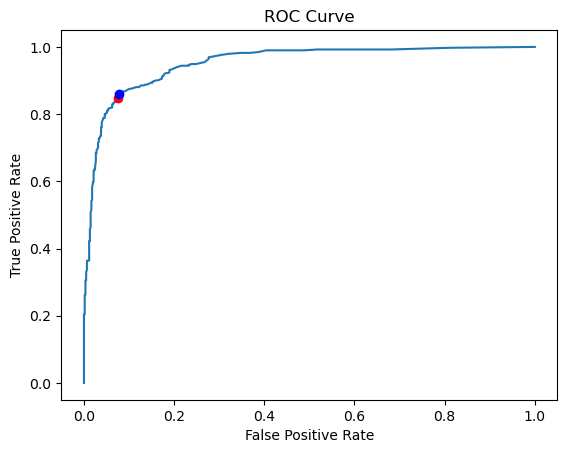

In [8]:
# Plot the ROC curve of this classifier with the test data. 
# Include in this plot the operational point of the classifiers in 1.b) and 1.c).
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y2, rfc_pred)
plt.plot(fpr, tpr)
plt.plot(fpP1, tpP1, 'ro')
plt.plot(fpP2, tpP2, 'bo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()  



<hr style="border:2px solid black"> </hr>

# Question 2 - SVMs:
## Consider a $\texttt{SVC}$ classifier with the following parameters: $\texttt{kernel='rbf'}$ and $\texttt{C=2}$.
### a) Train the $\texttt{SVC}$ classifier with the training data print the confusion matrix and the total number of errors for the test data.
### b) Preprocess the data using the function  $\texttt{StandardScaler}$, and train the $\texttt{SVC}$ classifier with the training data print the confusion matrix and the total number of errors for the test data.
### c) For the test data, plot the ROC curves and the Precision and Recall curves for both classifiers (2 curves per figure). Include in these plots the operating point of the classifiers.


## 2.a)

In [9]:
# Consider a SVC$ classifier with the following parameters: kernel='rbf' and $\texttt{C=2}$
# Train the $\texttt{SVC}$ classifier with the training data print the confusion matrix and the total number of errors for the test data.

from sklearn.svm import SVC

svc = SVC(kernel='rbf', C=2).fit(X1, y1)
y2_pred = svc.predict(X2)
print('Number of errors: ', np.sum(y2_pred != y2))

cm3 = confusion_matrix(y2, y2_pred)
print('Confusion matrix: \n', cm3)

fpP3 = cm3[0,1]/(cm3[0,1]+cm3[0,0]) # ponto 3 - dos dados nao normalizados
tpP3 = cm3[1,1]/(cm3[1,1]+cm3[1,0])


Number of errors:  236
Confusion matrix: 
 [[526  81]
 [155 238]]


## 2.b)

In [10]:
# Preprocess the data using the function  $\texttt{StandardScaler}$, and train the $\texttt{SVC}$ 
# classifier with the training data print the confusion matrix and the total number of errors for the test data.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X1)
X1_scaled = scaler.transform(X1)
X2_scaled = scaler.transform(X2)

svc = SVC(kernel='rbf', C=2).fit(X1_scaled, y1)
y2_pred = svc.predict(X2_scaled)
print('Number of errors: ', np.sum(y2_pred != y2))

cm4 = confusion_matrix(y2, y2_pred)
print('Confusion matrix: \n', cm4)

fpP4 = cm4[0,1]/(cm4[0,1]+cm4[0,0]) # ponto 4 - dos dados Normalizados
tpP4 = cm4[1,1]/(cm4[1,1]+cm4[1,0])



Number of errors:  124
Confusion matrix: 
 [[542  65]
 [ 59 334]]


## 2.c)

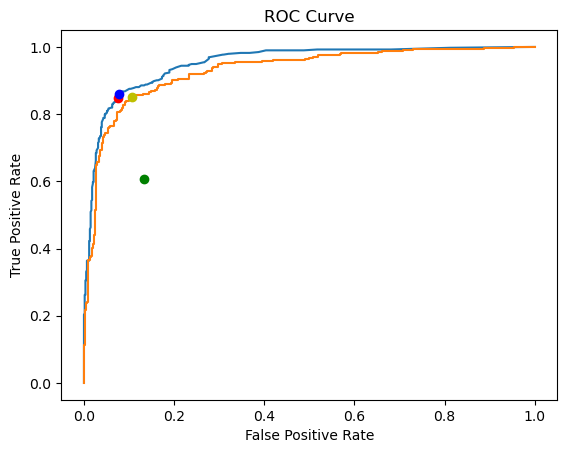

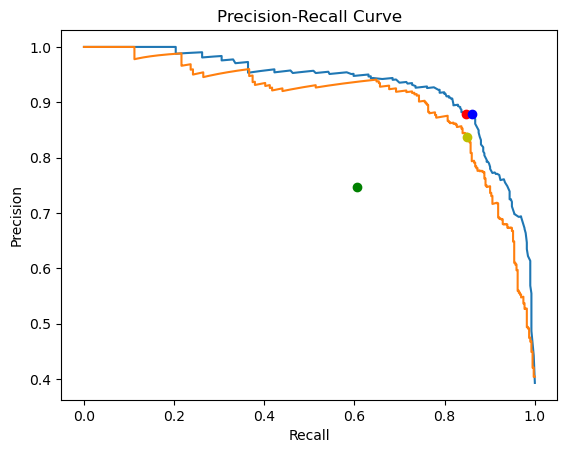

In [12]:
# For the test data, plot the ROC curves and the Precision and Recall curves for both classifiers (2 curves per figure). 
# Include in these plots the operating point of the classifiers.

from sklearn.metrics import precision_recall_curve
# plot the points for each classifier

rfc_pred = rnd.predict_proba(X2)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y2, rfc_pred)

svc_pred = svc.decision_function(X2_scaled)
fpr2, tpr2, thresholds2 = roc_curve(y2, svc_pred)

# calculate the precision and recall of cm1, cm2, cm3 and cm4
presicionP1 = cm1[1,1]/(cm1[1,1]+cm1[0,1])
recallP1 = cm1[1,1]/(cm1[1,1]+cm1[1,0])

presicionP2 = cm2[1,1]/(cm2[1,1]+cm2[0,1])
recallP2 = cm2[1,1]/(cm2[1,1]+cm2[1,0])

presicionP3 = cm3[1,1]/(cm3[1,1]+cm3[0,1]) 
recallP3 = cm3[1,1]/(cm3[1,1]+cm3[1,0])

presicionP4 = cm4[1,1]/(cm4[1,1]+cm4[0,1])
recallP4 = cm4[1,1]/(cm4[1,1]+cm4[1,0])


plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot(fpP1, tpP1, 'ro')
plt.plot(fpP2, tpP2, 'bo')
plt.plot(fpP3, tpP3, 'go')
plt.plot(fpP4, tpP4, 'yo')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()  

precision1, recall1, thresholds1 = precision_recall_curve(y2, rfc_pred)
precision2, recall2, thresholds2 = precision_recall_curve(y2, svc_pred)

plt.plot(recall1, precision1)
plt.plot(recall2, precision2)
plt.plot(recallP1, presicionP1, 'ro')
plt.plot(recallP2, presicionP2, 'bo')
plt.plot(recallP3, presicionP3, 'go') # ponto 3, é referente ao classificador sem normalização por isso nao esta na curva roc e precision-recall
plt.plot(recallP4, presicionP4, 'yo')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
